In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/workspaces/SML/SML /data_.xlsx')
df

,Sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [3]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values



In [4]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


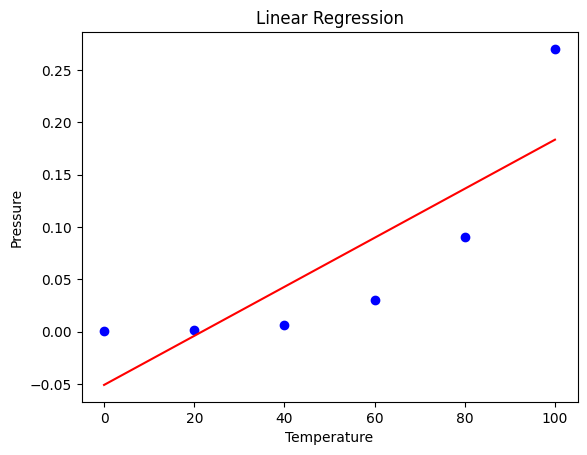

In [6]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')

plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

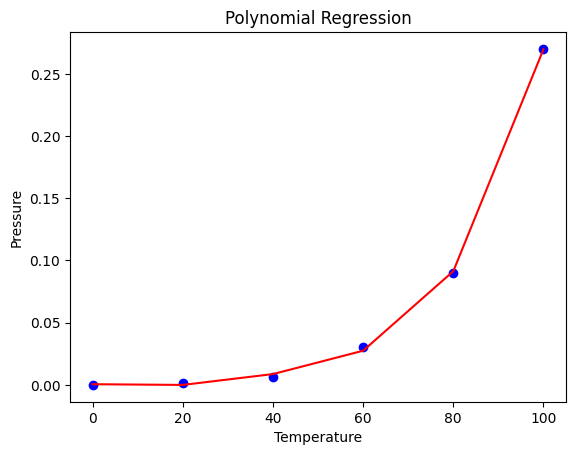

In [7]:
# Visualising the Polynomial Regression Results
plt.scatter(X,y,color='blue')
plt.plot(X,lin2.predict(poly.fit_transform(X)),color = 'Red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()


In [8]:
x = df[['Temperature']]
y = df['Pressure']

In [9]:
#train and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=100
)

In [10]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [11]:
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# 3. Predict on the test set
y_pred = poly_model.predict(x_test_poly)

In [12]:
# Predicting a new result with Linear Regression after converting predict variable to 2D array
pred = 110.0
predarray = np.array([[pred]])
lin.predict(predarray)


array([0.20675333])

In [13]:
# Predicting a new result with Polynomial Regression after converting predict variable to 2D array
pred2 = 110.0
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))


array([0.43295877])

RMSE 

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

#predictions using the polynomial test features
y_pred = lin2.predict(x_test_poly)

# Calculate MSE first
mse = mean_squared_error(y_test, y_pred)

# 3. Calculate RMSE by taking the square root
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.0020642645823318404


R2 Score

In [15]:
from sklearn.metrics import r2_score
y_train_pred = poly_model.predict(x_train_poly)
y_test_pred = poly_model.predict(x_test_poly)

# 2. Calculate R2 scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training R2 Score: {train_r2:.4f}")
print(f"Testing R2 Score: {test_r2:.4f}")

Training R2 Score: 1.0000
Testing R2 Score: -10.7672


Mean absolute error

In [16]:
from sklearn.metrics import mean_absolute_error
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")

Training MAE: 0.0000
Testing MAE: 0.0081
